Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


Data Loading and Preprocessing 

In [2]:

transactions = pd.read_csv("Transactions.csv", parse_dates=["TransactionDate"])
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv", parse_dates=["SignupDate"])


In [3]:
transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
products.head()


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:

customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
df = pd.merge(transactions, customers, on='CustomerID', how='left')
df = pd.merge(df, products, on='ProductID', how='left')

In [7]:
print([col for col in df.columns if 'CustomerID' in col])


['CustomerID']


In [8]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [10]:
duplicate_count = df.duplicated().sum()
duplicate_count
df.columns = df.columns.str.strip()

In [11]:
missing_values = df.isnull().sum()
missing_values

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['TransactionDate'], format='%m/%d/%Y %H:%M')
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Date,Month,Year
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08-25 12:38:23,8,2024
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05-27 22:23:54,5,2024
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04-25 07:38:55,4,2024
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03-26 22:55:37,3,2024
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03-21 15:10:10,3,2024


EDA ANALYSIS

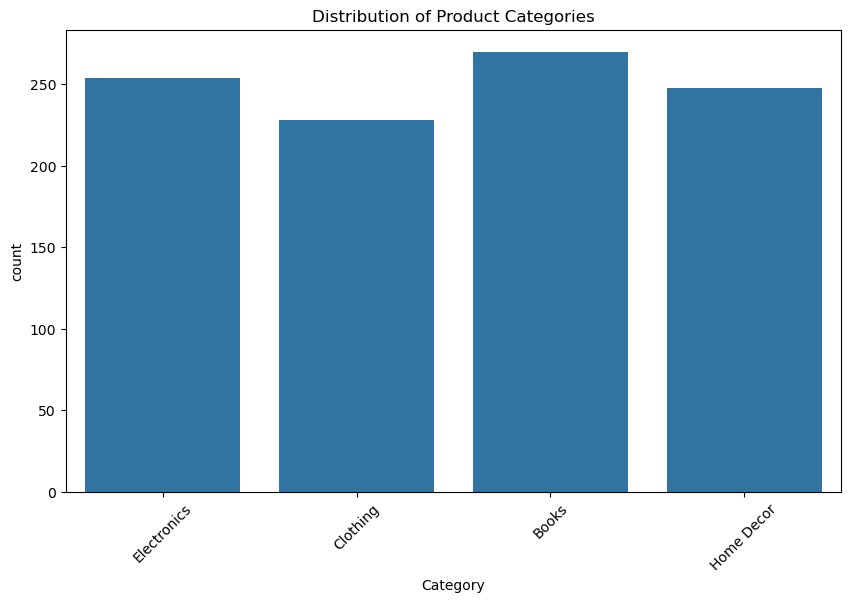

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

In [14]:
df.groupby(by=['CustomerID', 'Region'], as_index=False)['TransactionID'].count().head()


,CustomerID,Region,TransactionID
0,C0001,South America,5
1,C0002,Asia,4
2,C0003,South America,4
3,C0004,South America,8
4,C0005,Asia,3


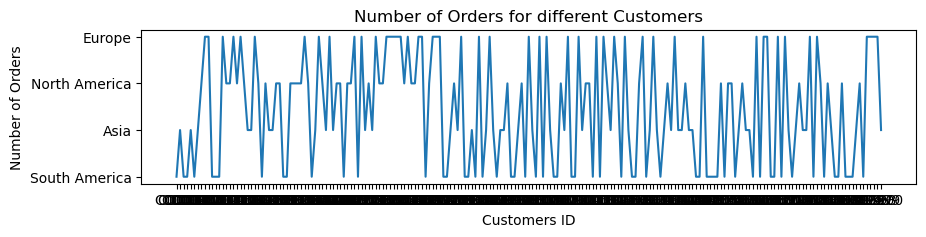

In [15]:
orders = df.groupby(by=['CustomerID','Region'], as_index=False)['TransactionID'].count()

plt.subplots(figsize=(10,2))
plt.plot(orders.CustomerID, orders.Region)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

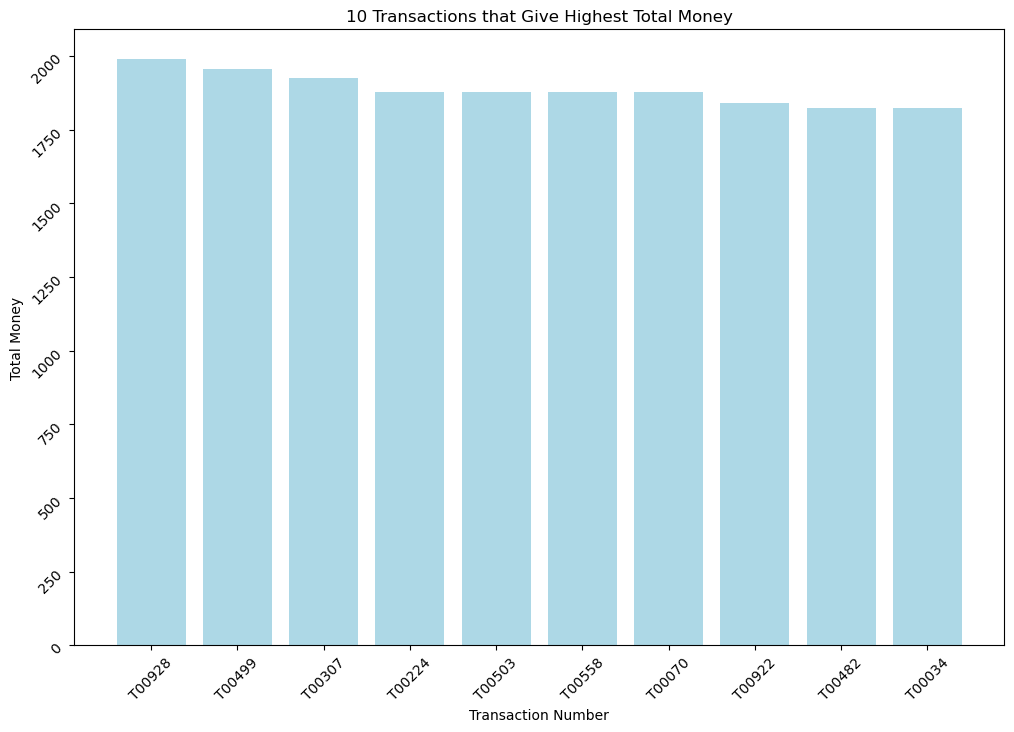

In [16]:

listTransaction = df['TransactionID'].unique()
listTotalMoney = []

for i in listTransaction:
    totalMoney = df['TotalValue'].loc[df['TransactionID'] == i].sum()
    listTotalMoney.append(totalMoney)

dictTransaction = {
    'TransactionID' : listTransaction,
    'TotalValue' : listTotalMoney
}

dfTransaction = pd.DataFrame(dictTransaction)
dfTransaction = dfTransaction.sort_values('TotalValue',ascending=False).head(10)
dfTransaction = dfTransaction.reset_index(drop=True)

plt.figure(figsize = (12,8))
plt.bar(data = dfTransaction, x = 'TransactionID',height = 'TotalValue', color = 'lightblue')
plt.title('10 Transactions that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Transaction Number')
plt.ylabel('Total Money')
plt.show()

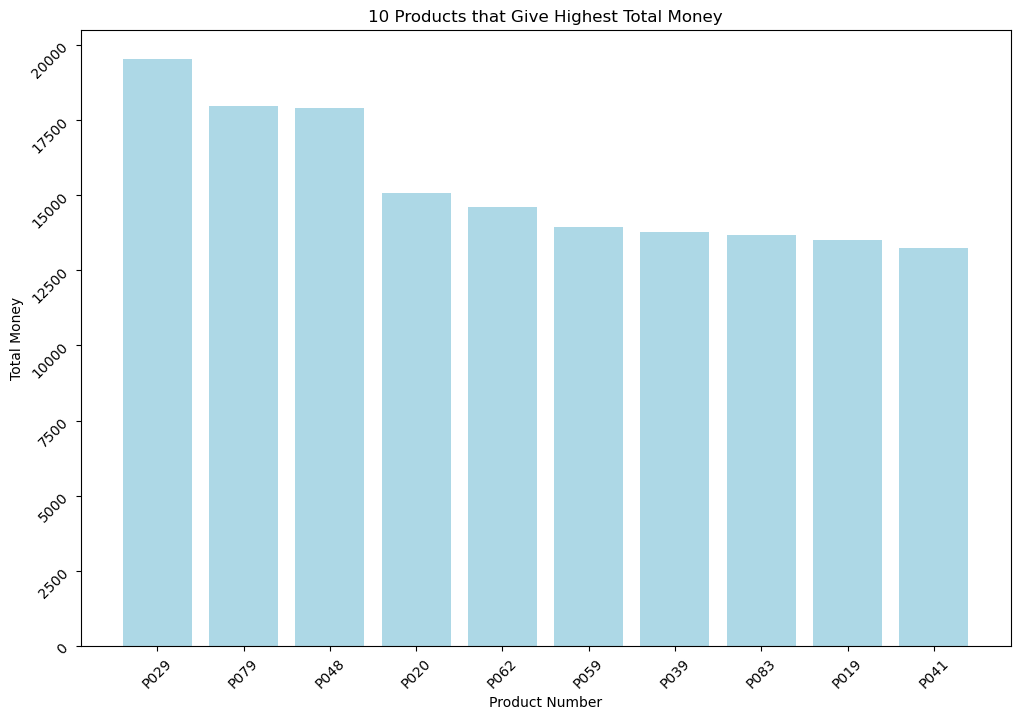

  ProductID  TotalValue               ProductName
0      P029    19513.80        TechPro Headphones
1      P079    17946.91            ActiveWear Rug
2      P048    17905.20          TechPro Cookbook
3      P020    15060.92         ActiveWear Jacket
4      P062    14592.24           HomeSense Novel
5      P059    13947.20           SoundWave Jeans
6      P039    13778.88        TechPro Smartwatch
7      P083    13671.60     ActiveWear Smartwatch
8      P019    13487.95     ComfortLiving Sweater
9      P041    13232.12  ComfortLiving Smartphone


In [17]:

listProduct = df['ProductID'].unique()
listTotalMoney = []

for i in listProduct:
    totalMoney = df['TotalValue'].loc[df['ProductID'] == i].sum()
    listTotalMoney.append(totalMoney)

dictProduct = {
    'ProductID' : listProduct,
    'TotalValue' : listTotalMoney
}

dfProduct = pd.DataFrame(dictProduct)
dfProduct = dfProduct.sort_values('TotalValue',ascending=False).head(10)
dfProduct = dfProduct.reset_index(drop=True)

plt.figure(figsize = (12,8))
plt.bar(data = dfProduct, x = 'ProductID',height = 'TotalValue', color = 'lightblue')
plt.title('10 Products that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Product Number')
plt.ylabel('Total Money')
plt.show()

listProductName = []
for i in dfProduct['ProductID']:
    a = df['ProductName'].loc[df['ProductID'] == i].unique()[0]
    listProductName.append(a) 
dfProduct['ProductName'] = listProductName
print(dfProduct)

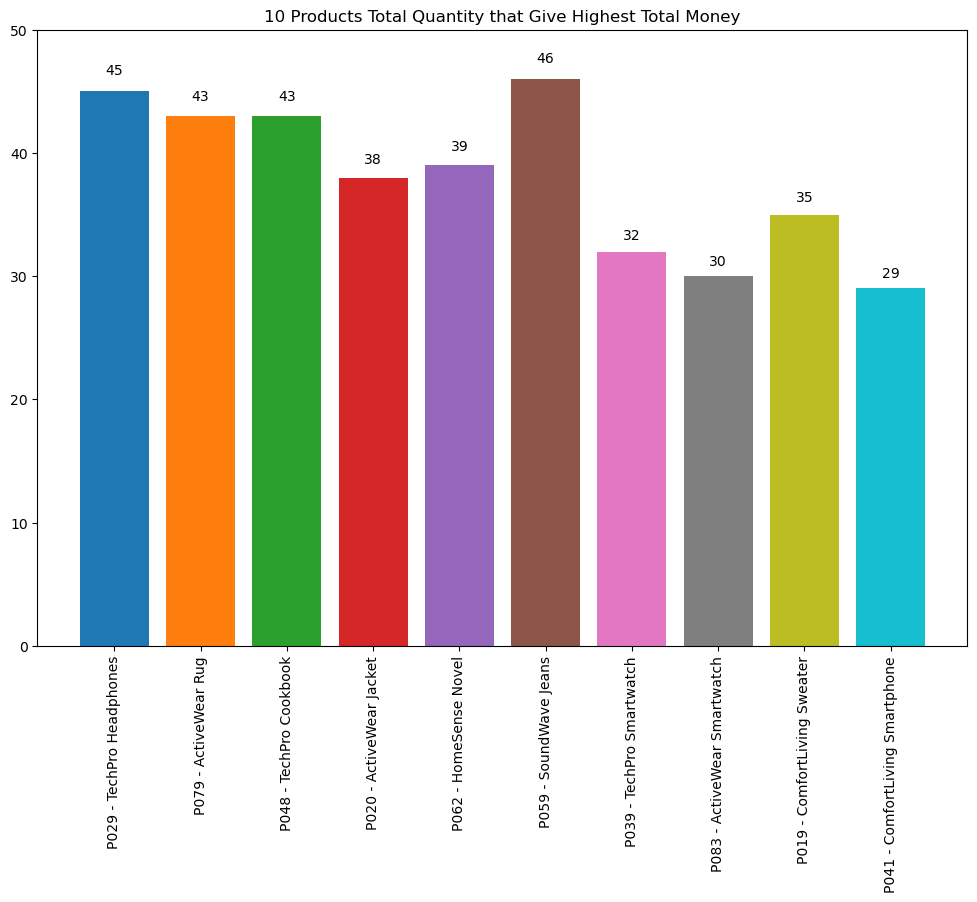

In [18]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductID'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    totalQuantity = round(df['Quantity'].loc[df['ProductID']==listProductNo[i]].sum(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,totalQuantity*1.03,totalQuantity,ha='center')
    plt.bar(x = labelx, height = totalQuantity)

plt.ylim(0,50)
plt.title('10 Products Total Quantity that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

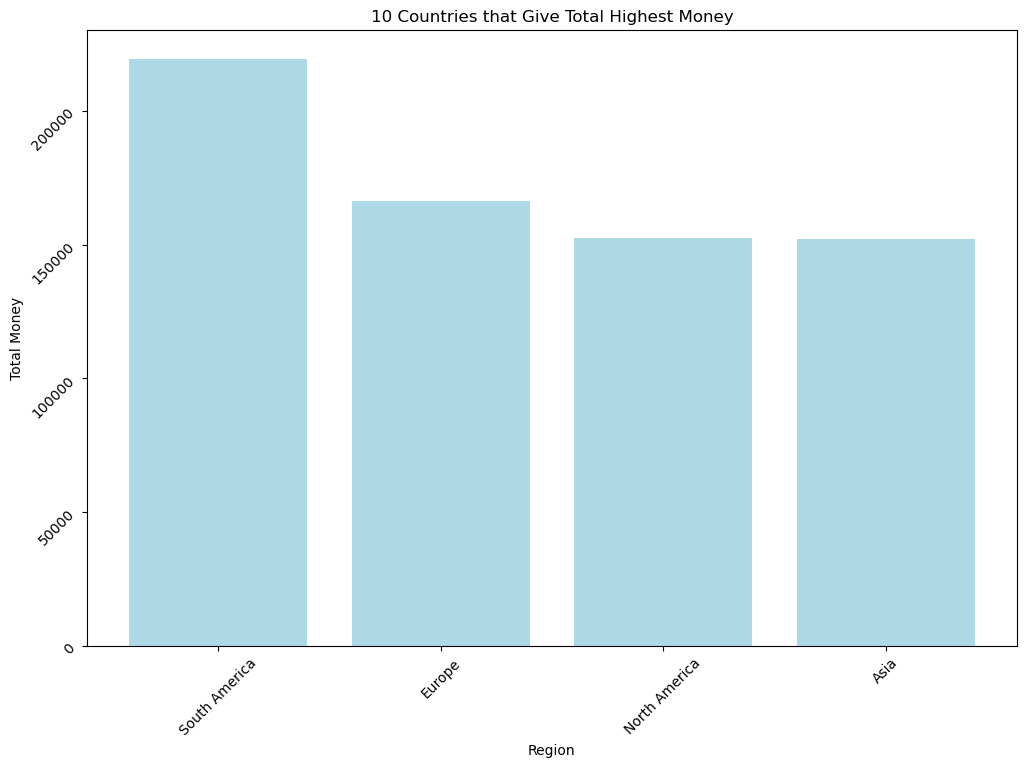

          Region      Value
0  South America  219352.56
1         Europe  166254.63
2  North America  152313.40
3           Asia  152074.97


In [ ]:

listCountry = df['Region'].unique()
listTotalMoney = []


for i in listCountry:
    totalMoney = round(df['TotalValue'].loc[df['Region'] == i].sum(),2)
    listTotalMoney.append(totalMoney)

dictCountry = {
    'Region' : listCountry,
    'Value' : listTotalMoney
}

dfCountry = pd.DataFrame(dictCountry)
dfCountry = dfCountry.sort_values('Value',ascending = False).head(10)
dfCountry = dfCountry.reset_index(drop = True)

plt.figure(figsize = (12,8))
plt.bar(data = dfCountry, x = 'Region',height = 'Value', color = 'lightblue')
plt.title('10 Countries that Give Total Highest Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Total Money')
plt.show()

print(dfCountry)

In [20]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Date,Month,Year
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08-25 12:38:23,8,2024
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05-27 22:23:54,5,2024
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04-25 07:38:55,4,2024
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03-26 22:55:37,3,2024
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03-21 15:10:10,3,2024


c:\Users\mohan\anaconda3\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\mohan\anaconda3\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


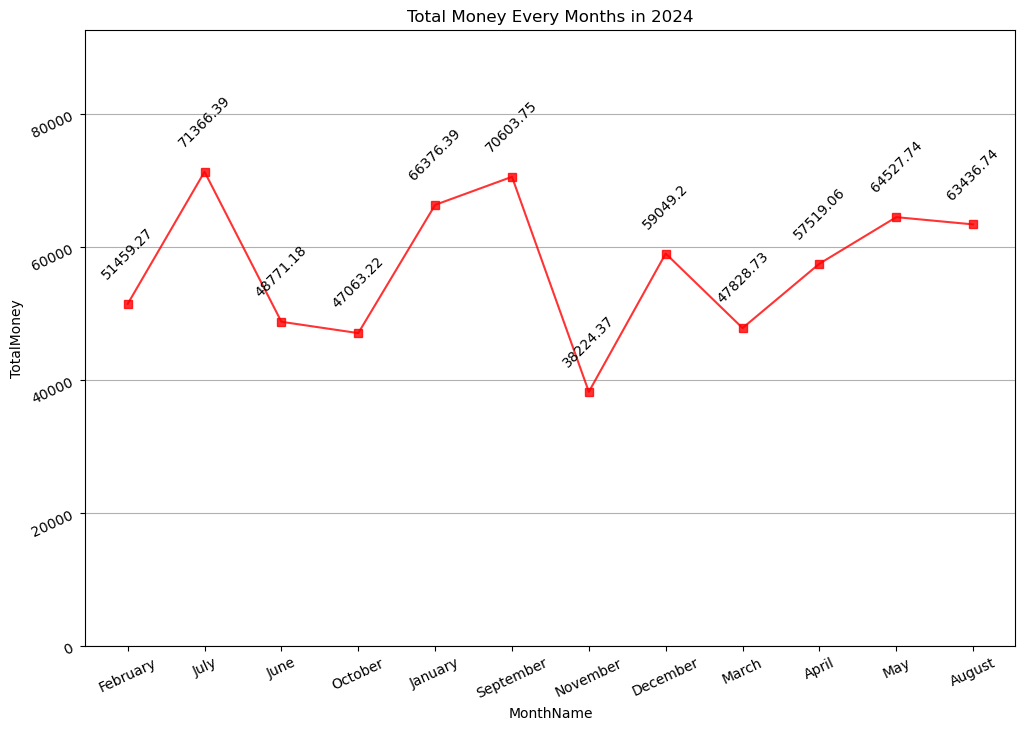

In [23]:

listMonth = []
listTotalMoney = []
for i in df['Month'].unique():
    monthName = dt.datetime.strptime(str(i), "%m")
    monthName = monthName.strftime("%B")
    listMonth.append(monthName)
for i in df['Month'].unique():
    totalMoney = round(df['TotalValue'].loc[(df['Month']==i)&(df['Year']==2024)].sum(),2)
    listTotalMoney.append(totalMoney)
    

dictMonth = {
    'MonthName' : listMonth,
    'TotalMoney' : listTotalMoney
}

dfMonth = pd.DataFrame(dictMonth)
dfMonth = dfMonth.iloc[::-1]

plt.figure(figsize = (12,8))
plt.plot(dfMonth['MonthName'], dfMonth['TotalMoney'], color = 'Red', marker = 's',alpha = 0.8)
plt.title('Total Money Every Months in 2024')
plt.yticks(rotation = 25)
plt.xticks(rotation = 25)
plt.xlabel('MonthName')
plt.ylabel('TotalMoney')
for i in dfMonth['MonthName']: 
    text = str(dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i].values[0])
    y = dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i]+(dfMonth['TotalMoney'].min()*0.1)
    plt.text(i,y,text, ha = 'center', rotation = 45) 
plt.ylim(0,dfMonth['TotalMoney'].max()*1.3)
plt.grid(axis = 'y')
plt.show()

In [79]:
def searchTotalMoney(country,month):
    return round(df['TotalValue'].loc[(df['Region'] == country)&(df['Month'] == month)].sum(),2)

def searchHighestTotalMoneyCountry(month):
    listMoney = []
    maxCountry = 'none'
    for i in listCountry:
        total = searchTotalMoney(i,month)
        listMoney.append(total)
        maxMoney = max(listMoney) 
        if total >= maxMoney:
            maxCountry = i 
    return([maxMoney,maxCountry])

listTotalMoney = []
listHighCountry = []

for i in df['Month'].unique():
    templist = searchHighestTotalMoneyCountry(i)
    listTotalMoney.append(templist[0])
    listHighCountry.append(templist[1])

dictHighCountMonth = {
    'Month' : listMonth,
    'Country Name' : listHighCountry,
    'Total Money' : listTotalMoney
}             

dfCountMonth = pd.DataFrame(dictHighCountMonth)
dfCountMonth = dfCountMonth.iloc[::-1]
dfCountMonth = dfCountMonth.reset_index(drop = True)
dfCountMonth

,Month,Country Name,Total Money
0,February,South America,18769.20
1,July,South America,27602.77
2,June,South America,16788.05
3,October,South America,18628.91
4,January,Asia,19429.97
5,September,South America,20924.36
6,November,South America,15246.28
7,December,Europe,18828.73
8,March,North America,14974.31
9,April,North America,22969.02


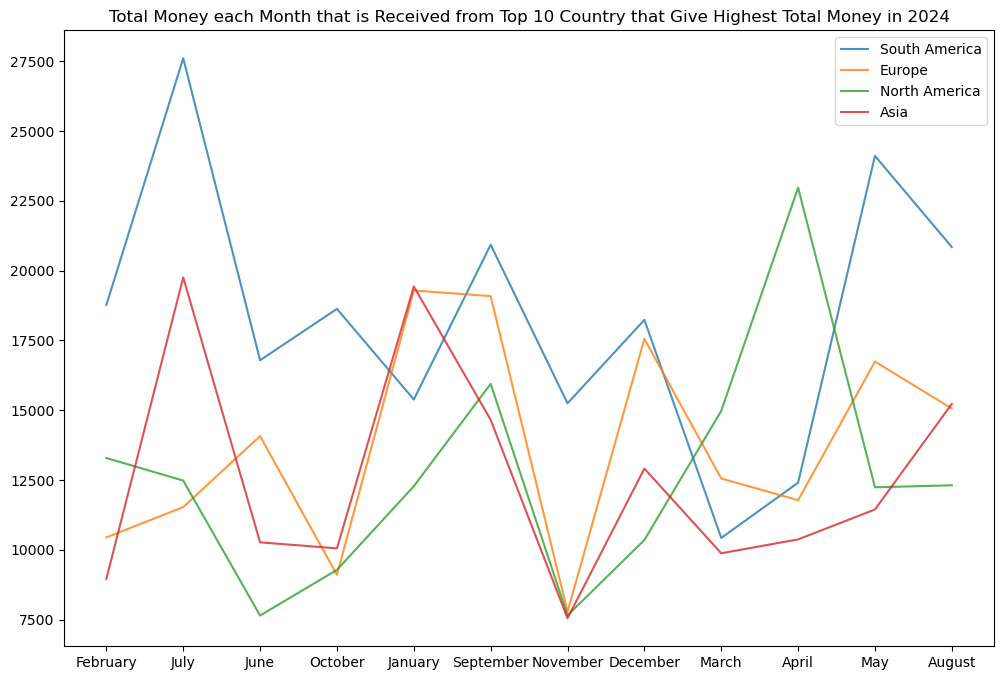

In [85]:
plt.figure(figsize = (12,8))
topTenCountry = dfCountry['Region'].unique().copy()
listMonthTopTen = listMonth.reverse()
listMonthTopTen = listMonth 

for i in topTenCountry:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalValue'].loc[(df['Region']==i)&((df['Month']==j)&(df['Year']==2024))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Money each Month that is Received from Top 10 Country that Give Highest Total Money in 2024')
plt.legend(topTenCountry)
plt.show()


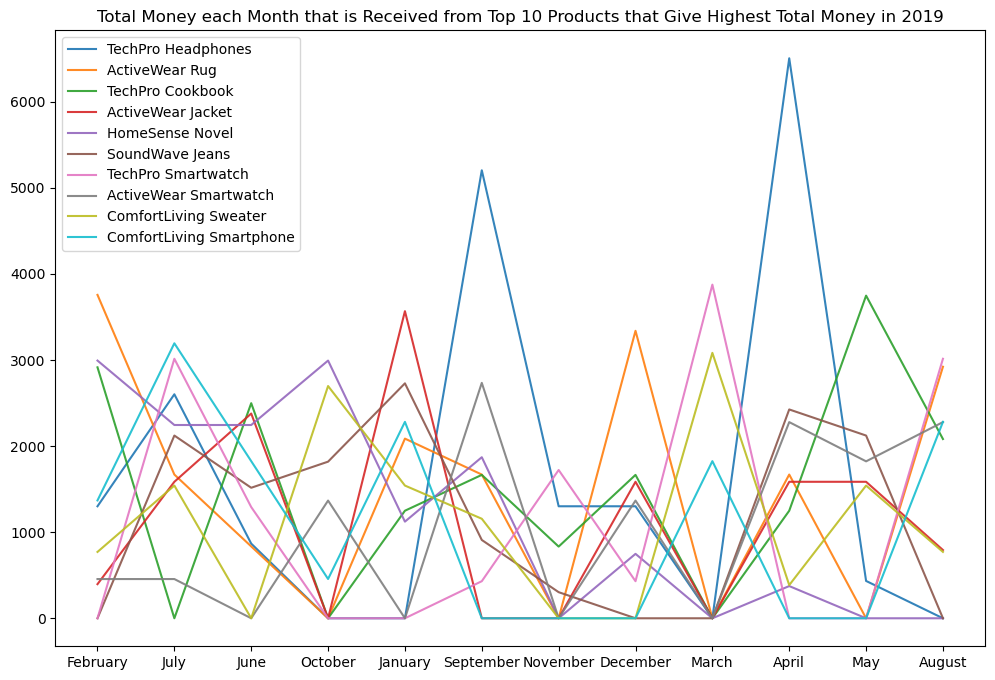

In [91]:
plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductID'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalValue'].loc[(df['ProductID']==i)&((df['Month']==j)&(df['Year']==2024))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.9) 

plt.title('Total Money each Month that is Received from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

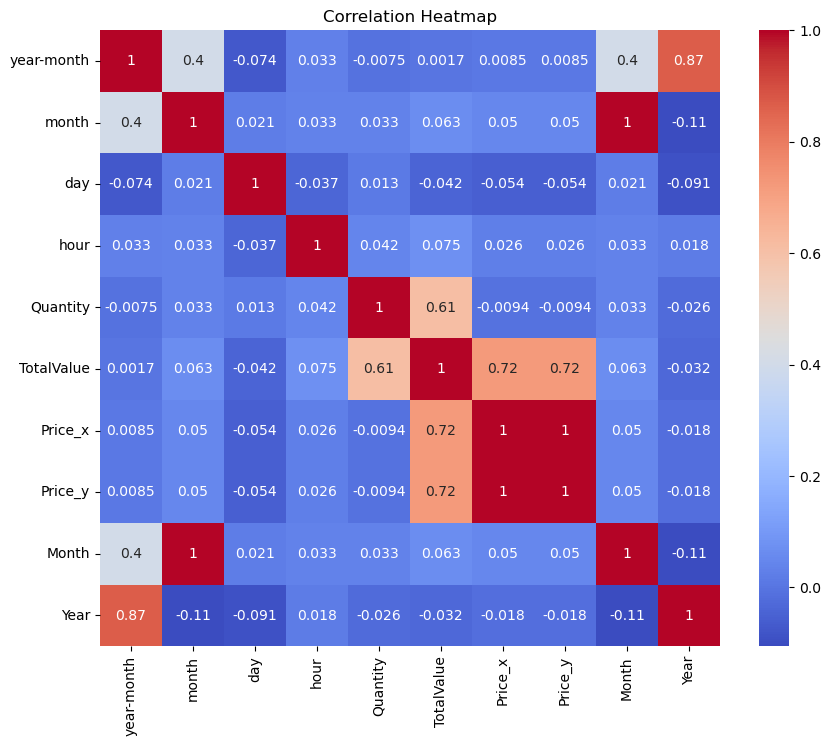

In [93]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()